In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

from scipy import sparse

import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
book=pd.read_csv('/Users/shraddhalipane/Desktop/MyProject/MyBooks/MyBooks/Books.csv', sep=',',encoding="ISO-8859-1",index_col= None, low_memory= False , dtype={'book_author': str})
rating=pd.read_csv('/Users/shraddhalipane/Desktop/MyProject/MyBooks/MyBooks/Ratings.csv')
user=pd.read_csv('/Users/shraddhalipane/Desktop/MyProject/Users.csv')


In [4]:
print(book.shape)
print(rating.shape)
print(user.shape)

(271360, 8)
(1048575, 3)
(278858, 3)


# book data

In [5]:
book.head(2)

,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   isbn              271360 non-null  object
 1   book_title        271360 non-null  object
 2   book_author       271358 non-null  object
 3   publication_year  271360 non-null  object
 4   Publisher         271358 non-null  object
 5   image_url_s       271360 non-null  object
 6   image_url_m       271360 non-null  object
 7   image_url_l       271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
book.isnull().sum()

isbn                0
book_title          0
book_author         2
publication_year    0
Publisher           2
image_url_s         0
image_url_m         0
image_url_l         3
dtype: int64

In [8]:
missing_publishers = book[book['Publisher'].isnull()]
df_cleaned = book.dropna(subset=['Publisher'])
df_filled = book.fillna({'Publisher': 'Unknown'})
book['Publisher'].fillna(book['book_author'], inplace=True)
book.isnull().sum()

isbn                0
book_title          0
book_author         2
publication_year    0
Publisher           0
image_url_s         0
image_url_m         0
image_url_l         3
dtype: int64

In [9]:
missing_author = book[book['book_author'].isnull()]
ds_cleaned = book.dropna(subset=['book_author'])
df_filled_with= book.fillna({'book_author': 'Unknown'})
book['book_author'].fillna(book['Publisher'], inplace=True)

book.isnull().sum()

isbn                0
book_title          0
book_author         0
publication_year    0
Publisher           0
image_url_s         0
image_url_m         0
image_url_l         3
dtype: int64

In [10]:
book.dropna(inplace=True)
book.isnull().sum()

isbn                0
book_title          0
book_author         0
publication_year    0
Publisher           0
image_url_s         0
image_url_m         0
image_url_l         0
dtype: int64

In [11]:
duplicate_criteria = ['book_title', 'book_author']

# Remove duplicate entries based on the specified criteria
df_no_duplicates = book.drop_duplicates(subset=duplicate_criteria, keep='first')


# Save the new DataFrame without duplicates to a new file
df_no_duplicates.to_csv('book.csv', index=False)


In [12]:
book.shape

(271357, 8)

In [13]:
book['publication_year'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', '1909', '2008', '1378', '1919', '1922',
       '1

In [14]:
# changing dtype of year of publication
book['publication_year'] =book['publication_year'].astype(int)
   

In [15]:
# something is off about years of publication like:
book[(book['publication_year'] > 0) & (book['publication_year'] < 1800)]
  

,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...,http://images.amazon.com/images/P/9643112136.0...
253750,964442011X,Tasht-i khun,IsmaÃÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...,http://images.amazon.com/images/P/964442011X.0...


In [16]:
#replacing with correct  values
book.loc[book.isbn=='9643112136','publication_year'] = 2010
book.loc[book.isbn=='964442011X', 'publication_year'] = 1991

In [17]:
#Sustituting np.Nan in rows with year=0 or  greater than the current year,2022.
book.loc[(book['publication_year'] > 2022) | (book['publication_year'] == 0),'publication_year'] = np.NAN

# replacing NaN values with median value of Year-Of-Publication
book['publication_year'].fillna(int(book['publication_year'].median()), inplace=True)
     

In [18]:
#Uppercasing the ISBN numbers
book['isbn']=book['isbn'].str.upper()
     

In [19]:

book[book['book_title']=='Emma']

,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l
1495,451523067,Emma,Jane Austen,1994.0,New Amer Library Classics,http://images.amazon.com/images/P/0451523067.0...,http://images.amazon.com/images/P/0451523067.0...,http://images.amazon.com/images/P/0451523067.0...
8763,055321019X,Emma,Jane Austen,1981.0,Bantam Books,http://images.amazon.com/images/P/055321019X.0...,http://images.amazon.com/images/P/055321019X.0...,http://images.amazon.com/images/P/055321019X.0...
11571,553212737,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553212737.0...,http://images.amazon.com/images/P/0553212737.0...,http://images.amazon.com/images/P/0553212737.0...
14263,140258175,Emma,Jane Austen,1996.0,Penguin Putnam~trade,http://images.amazon.com/images/P/0140258175.0...,http://images.amazon.com/images/P/0140258175.0...,http://images.amazon.com/images/P/0140258175.0...
45955,B000051WXP,Emma,Jane Austen,1996.0,Random House,http://images.amazon.com/images/P/B000051WXP.0...,http://images.amazon.com/images/P/B000051WXP.0...,http://images.amazon.com/images/P/B000051WXP.0...
53513,760701652,Emma,Jane Austen,1996.0,Barnes Noble Books,http://images.amazon.com/images/P/0760701652.0...,http://images.amazon.com/images/P/0760701652.0...,http://images.amazon.com/images/P/0760701652.0...
90473,2253140732,Emma,Jane Austen,1997.0,LGF,http://images.amazon.com/images/P/2253140732.0...,http://images.amazon.com/images/P/2253140732.0...,http://images.amazon.com/images/P/2253140732.0...
106616,460010247,Emma,Jane Austen,1976.0,J m Dent &amp; Sons Ltd,http://images.amazon.com/images/P/0460010247.0...,http://images.amazon.com/images/P/0460010247.0...,http://images.amazon.com/images/P/0460010247.0...
133269,553211595,Emma,Jane Austen,1984.0,Bantam,http://images.amazon.com/images/P/0553211595.0...,http://images.amazon.com/images/P/0553211595.0...,http://images.amazon.com/images/P/0553211595.0...
166404,681218894,Emma,Jane Austen,1996.0,Hunter Publishing+inc,http://images.amazon.com/images/P/0681218894.0...,http://images.amazon.com/images/P/0681218894.0...,http://images.amazon.com/images/P/0681218894.0...


In [20]:

#Checking for duplicates in books_df
book[book.duplicated()]  

,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l
6635,002542730X,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),Nathaniel Hawthorne,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...,http://images.amazon.com/images/P/014062080X.0...
16298,097089726X,Jasper,Michelle Groce,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.0...,http://images.amazon.com/images/P/097089726X.0...,http://images.amazon.com/images/P/097089726X.0...
19266,039592720X,Interpreter of Maladies,Jhumpa Lahiri,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...,http://images.amazon.com/images/P/039592720X.0...
22339,042512164X,Capital Crimes,Lawrence Sanders,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.0...,http://images.amazon.com/images/P/042512164X.0...,http://images.amazon.com/images/P/042512164X.0...
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. Ron Hubbard,1995.0,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.0...,http://images.amazon.com/images/P/088404632X.0...,http://images.amazon.com/images/P/088404632X.0...
269297,055215038X,The Sleeper,Gillian White,2003.0,Corgi Books,http://images.amazon.com/images/P/055215038X.0...,http://images.amazon.com/images/P/055215038X.0...,http://images.amazon.com/images/P/055215038X.0...
269552,037376099X,Patient Nurse (Man Of The Month) (Harlequin D...,Diana Palmer,1997.0,Silhouette,http://images.amazon.com/images/P/037376099X.0...,http://images.amazon.com/images/P/037376099X.0...,http://images.amazon.com/images/P/037376099X.0...
270285,189481505X,I-O,Simon Logan,2002.0,Prime (OH),http://images.amazon.com/images/P/189481505X.0...,http://images.amazon.com/images/P/189481505X.0...,http://images.amazon.com/images/P/189481505X.0...


In [21]:
#Dropping the rows with the entire column values are duplicated
book.drop_duplicates(keep="first",inplace=True)
book.reset_index(drop=True,inplace=True)

In [22]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271044 entries, 0 to 271043
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   isbn              271044 non-null  object 
 1   book_title        271044 non-null  object 
 2   book_author       271044 non-null  object 
 3   publication_year  271044 non-null  float64
 4   Publisher         271044 non-null  object 
 5   image_url_s       271044 non-null  object 
 6   image_url_m       271044 non-null  object 
 7   image_url_l       271044 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.5+ MB


In [23]:
book.shape

(271044, 8)

# rating data

In [24]:
rating.head(2)

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,155061224,5


In [25]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1048575 non-null  int64 
 1   isbn         1048575 non-null  object
 2   book_rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [26]:
rating.isna().sum()

user_id        0
isbn           0
book_rating    0
dtype: int64

In [27]:
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating['user_id'].nunique(), rating['isbn'].nunique()))
     


Number of unique user ids is 95513 and ISBN no. is 322102


In [28]:
# making all the ISBN no. uppercase
rating['isbn'].apply(lambda x: x.upper())
     

0          034545104X
1           155061224
2           446520802
3          052165615X
4           521795028
              ...    
1048570     451410777
1048571     452264464
1048572    048623715X
1048573     486256588
1048574     515069434
Name: isbn, Length: 1048575, dtype: object

In [29]:
rating[rating.duplicated()].sum()
 

user_id                                                 16768155
isbn           9.78E+126.31E+116.31E+119.78E+129.78E+129.78E+...
book_rating                                                  354
dtype: object

In [30]:
# Droping the duplicates based on 'user_id', 'isbn', and 'book_rating'
rating = rating.drop_duplicates(subset=['user_id', 'isbn', 'book_rating'], keep='first')
rating[rating.duplicated()].sum()

user_id        0
isbn           0
book_rating    0
dtype: object

In [31]:
# all the books in rating_df are also in books_df
rating_df = rating[rating['isbn'].isin(book['isbn'])]
     

In [32]:
print('Shape of rating_df: {} and rating_df_new: {}'.format(rating.shape, rating_df.shape))
 

Shape of rating_df: (1048429, 3) and rating_df_new: (940613, 3)


In [33]:
# book ratings
rating_df['book_rating'].value_counts().reset_index()
    

,book_rating,count
0,0,588941
1,8,84088
2,10,65084
3,7,60778
4,9,55943
5,5,41800
6,6,28962
7,4,6857
8,3,4683
9,2,2138


In [34]:
# most popular books
rating_df.groupby('isbn')['book_rating'].count().reset_index().sort_values(by='book_rating', ascending=False)[:10]
     

,isbn,book_rating
256482,971880107,2263
73407,316666343,1164
111676,385504209,813
67550,312195516,668
167844,60928336,662
6964,044023722X,595
23902,142001740,555
10965,067976402X,552
176135,671027360,536
132328,446672211,527


In [35]:
rating_df.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


# user data

In [36]:
user.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [37]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [38]:
#Checking for duplicates in users_df
user[user['user_id'].duplicated()].sum()
 

user_id       0
location      0
age         0.0
dtype: object

In [39]:
user.count()

user_id     278858
location    278858
age         168096
dtype: int64

In [40]:
mean_age = user['age'].mean()
user['age'].fillna(mean_age, inplace=True)

In [41]:
user.count()

user_id     278858
location    278858
age         278858
dtype: int64

In [42]:
user.head()

,user_id,location,age
0,1,"nyc, new york, usa",34.751434
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.751434
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.751434


In [43]:
#Percentage of missing values in users_df
print(user.isnull().sum()/len(user)*100)
    

user_id     0.0
location    0.0
age         0.0
dtype: float64


In [44]:
user.age = user.age.fillna(user.age.mean())
user.age = user.age.astype(np.int64)

In [45]:
users = user[user['age'] > 5]

# Display the resulting DataFrame
users.count()

user_id     277950
location    277950
age         277950
dtype: int64

In [46]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import string
import re

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors



In [47]:
def clean_text(text):
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',text) 
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    
    #remove newline char
    text = re.sub('\n', '', text)
    
    return text

In [48]:
book.book_title = book.book_title.apply(lambda x:clean_text(x))

In [49]:
import pandas as pd
from scipy import stats

# Assuming 'data' is your DataFrame and 'column_name' is the column containing the data

# Convert the column to numeric (assuming it contains strings)
book['publication_year'] = pd.to_numeric(book['publication_year'], errors='coerce')

# Drop rows with NaN values after conversion
data = book.dropna(subset=['publication_year'])

# Calculate z-scores
z_scores = stats.zscore(data['publication_year'])
threshold = 3

# Keep only rows with Z-Scores within the threshold
book = data[(z_scores < threshold) & (z_scores > -threshold)]




In [50]:
book.shape

(268356, 8)

# merged all datasets

In [51]:
books_rating_df = pd.merge(book, rating_df, on='isbn', how='inner')
final_df = pd.merge(books_rating_df, user, on='user_id', how='inner')
final_df.head()


,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",34
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",34
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",34
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",34


In [52]:
total_rating_count = final_df.groupby('book_title')['book_rating'].count().reset_index()
total_rating_count.columns = ['book_title', 'total_rating_count']

# Merge the total_rating_count with the original DataFrame
main = pd.merge(final_df, total_rating_count, on='book_title', how='left')


In [53]:
main = main[main['total_rating_count'] > 50]
main

,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,total_rating_count
5,399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0,"timmins, ontario, canada",34,281
19,786868716,The Five People You Meet in Heaven,Mitch Albom,2003.0,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,11400,9,"ottawa, ontario, canada",49,392
20,151008116,Life of Pi,Yann Martel,2002.0,Harcourt,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,11400,6,"ottawa, ontario, canada",49,597
21,671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998.0,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,11400,0,"ottawa, ontario, canada",49,434
22,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,11400,7,"ottawa, ontario, canada",49,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933232,99175525,Protect and Defend,RICHARD NORTH PATTERSON,2002.0,Arrow,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,92219,8,"inverness, scotland, united kingdom",55,96
933233,99175525,Protect and Defend,RICHARD NORTH PATTERSON,2002.0,Arrow,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,211911,0,"dublin 4, n/a, ireland",34,96
933258,0385722206 0,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002.0,Anchor,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,156422,9,"lafayette, california, usa",55,260
933650,8425328055,Cujo,Stephen King,1995.0,Grijalbo,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,228196,0,"cornella de llobregat (barcelona), barcelona, ...",29,126


In [54]:
main.shape

(246979, 13)

In [55]:
main.head()

,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,total_rating_count
5,399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0,"timmins, ontario, canada",34,281
19,786868716,The Five People You Meet in Heaven,Mitch Albom,2003.0,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,11400,9,"ottawa, ontario, canada",49,392
20,151008116,Life of Pi,Yann Martel,2002.0,Harcourt,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,11400,6,"ottawa, ontario, canada",49,597
21,671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998.0,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,11400,0,"ottawa, ontario, canada",49,434
22,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,11400,7,"ottawa, ontario, canada",49,668


In [56]:
main['book_rating'].value_counts()

book_rating
0     148531
8      24986
10     18113
9      17509
7      16860
5       9402
6       7612
4       1791
3       1258
2        582
1        335
Name: count, dtype: int64

In [57]:
# Find the book with the maximum rating
max_rating_book = main.loc[main['total_rating_count'].idxmax()]['book_title']
print(f"Book with the maximum rating: {max_rating_book}")


Book with the maximum rating: Wild Animus


In [58]:
# Find the book with the minimum rating
min_rating_book = main.loc[main['total_rating_count'].idxmin()]['book_title']
min_rating_book


'Mount Vernon Love Story : A Novel of George and Martha Washington'

In [59]:
pd.set_option('display.float_format', lambda x:'%.3f' %x)
print(main['total_rating_count'].describe())

count   246979.000
mean       209.853
std        257.199
min         51.000
25%         79.000
50%        130.000
75%        245.000
max       2263.000
Name: total_rating_count, dtype: float64


In [60]:
main = main.drop_duplicates(['user_id', 'book_title'])

array([[<AxesSubplot:title={'center':'publication_year'}>,
        <AxesSubplot:title={'center':'user_id'}>],
       [<AxesSubplot:title={'center':'book_rating'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'total_rating_count'}>,
        <AxesSubplot:>]], dtype=object)

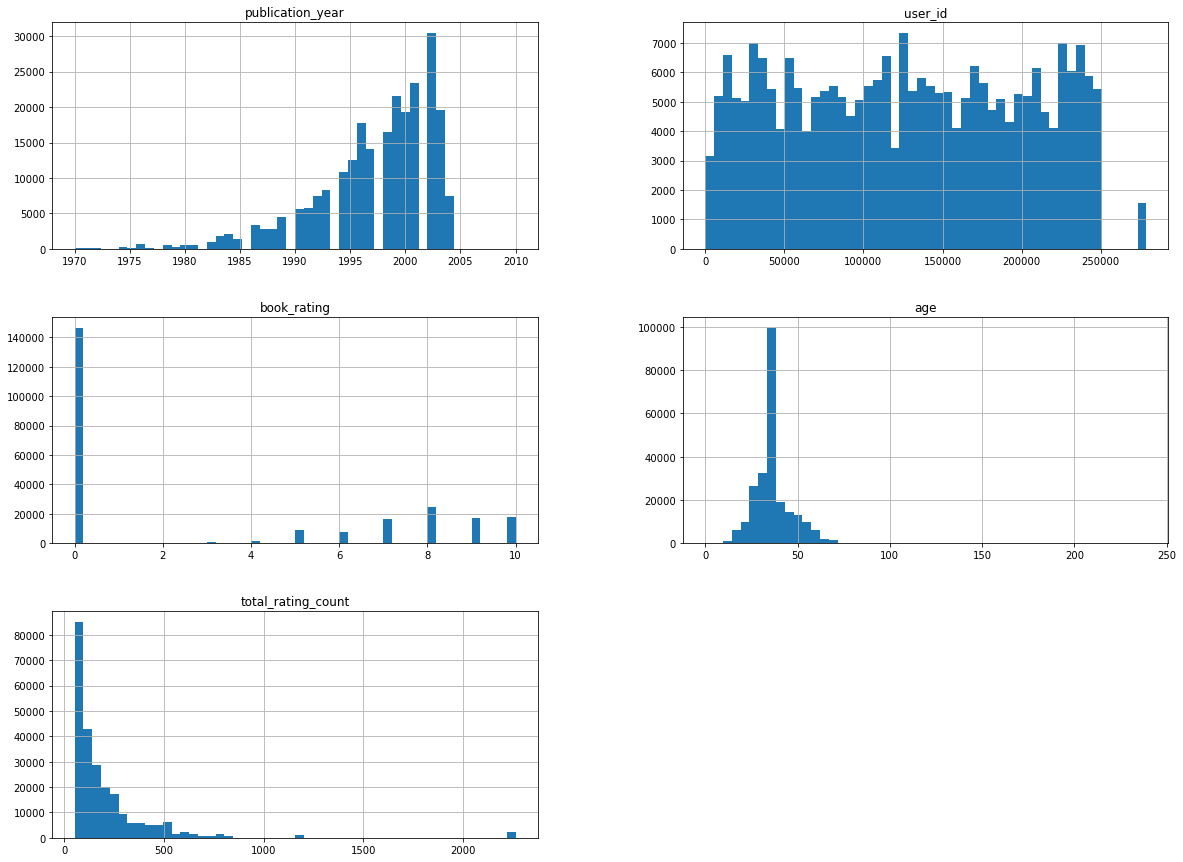

In [61]:
main.hist(bins=50,figsize=(20,15))

In [62]:

main

,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,total_rating_count
5,399135782,The Kitchen God's Wife,Amy Tan,1991.000,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0,"timmins, ontario, canada",34,281
19,786868716,The Five People You Meet in Heaven,Mitch Albom,2003.000,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,11400,9,"ottawa, ontario, canada",49,392
20,151008116,Life of Pi,Yann Martel,2002.000,Harcourt,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,11400,6,"ottawa, ontario, canada",49,597
21,671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998.000,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,11400,0,"ottawa, ontario, canada",49,434
22,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.000,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,11400,7,"ottawa, ontario, canada",49,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933232,99175525,Protect and Defend,RICHARD NORTH PATTERSON,2002.000,Arrow,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,92219,8,"inverness, scotland, united kingdom",55,96
933233,99175525,Protect and Defend,RICHARD NORTH PATTERSON,2002.000,Arrow,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,211911,0,"dublin 4, n/a, ireland",34,96
933258,0385722206 0,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002.000,Anchor,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,156422,9,"lafayette, california, usa",55,260
933650,8425328055,Cujo,Stephen King,1995.000,Grijalbo,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,228196,0,"cornella de llobregat (barcelona), barcelona, ...",29,126


# Data Analyze

# User-Item matrix

In [63]:
from scipy.sparse import csr_matrix

In [64]:
user_item_matrix = main.pivot(index='book_title',columns='user_id',values='book_rating').fillna(0)

In [65]:
# Check for duplicate book titles
duplicates = user_item_matrix.columns.duplicated()

# Display duplicate book titles
print(user_item_matrix.columns[duplicates])


Index([], dtype='int64', name='user_id')


In [66]:
matrix_df = csr_matrix(user_item_matrix.values)


In [67]:
user_item_matrix = user_item_matrix.dropna(axis=0)  # Remove rows with NaN values
user_item_matrix = user_item_matrix.dropna(axis=1)  # Remove columns with NaN values


In [68]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(user_item_matrix)
similarity_scores.shape

(2119, 2119)

#  Item-Based Collaborative Filtering using Cosine Similarity

In [69]:
from scipy.sparse import csr_matrix
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
list(enumerate(similarity_scores[3]))

[(0, 0.04473769245096004),
 (1, 0.013479928992554815),
 (2, 0.017557771089930823),
 (3, 0.9999999999999999),
 (4, 0.008176699103192714),
 (5, 0.0),
 (6, 0.02856916303906723),
 (7, 0.1625231382547445),
 (8, 0.08690390546157292),
 (9, 0.0),
 (10, 0.009293101001889445),
 (11, 0.02253019709800618),
 (12, 0.0),
 (13, 0.03462890967618035),
 (14, 0.031589662681037606),
 (15, 0.03281142938515203),
 (16, 0.016432893430173894),
 (17, 0.0),
 (18, 0.04975803559248826),
 (19, 0.010850428152202751),
 (20, 0.006771219881858349),
 (21, 0.04406047802841506),
 (22, 0.029557369690720835),
 (23, 0.02420229137457295),
 (24, 0.026088791343391163),
 (25, 0.02790995293261471),
 (26, 0.01816975877578023),
 (27, 0.02166283813406212),
 (28, 0.03102071704277385),
 (29, 0.03664409348157455),
 (30, 0.010348249434260002),
 (31, 0.023410800438482704),
 (32, 0.09286525673110554),
 (33, 0.01150370588097206),
 (34, 0.03832467737324382),
 (35, 0.018754077843590886),
 (36, 0.01306306226168024),
 (37, 0.029500023186912108)

# Applying KNN 

In [71]:
from sklearn.neighbors import NearestNeighbors


In [72]:
knn_model=NearestNeighbors( metric ='cosine', algorithm='brute',n_neighbors=7, n_jobs=-1)
knn_model.fit(matrix_df)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=7)

In [73]:
query_index = np.random.choice(user_item_matrix.shape[0])
print(query_index)
distances, indices = knn_model.kneighbors(user_item_matrix.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

57


In [74]:
user_item_matrix.index[query_index]

'A Separate Peace'

In [75]:
user_item_matrix.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [76]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_item_matrix.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_item_matrix.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for A Separate Peace:

1: Lucky's Lady, with distance of 0.8877114261445707:
2: The Secret Garden, with distance of 0.9133614936076246:
3: Ragtime, with distance of 0.9186288721137075:
4: The Green Mile: The Bad Death of Eduard Delacroix (Green Mile Series), with distance of 0.9193459891247334:
5: Home for the Holidays, with distance of 0.9203401738833465:


In [77]:
#Get top 10 nearest neighbors
indices = knn_model.kneighbors((user_item_matrix).loc[['1984']].values, 10, return_distance=False)

# Convert the result to a flat NumPy array
recommended_books = user_item_matrix.index[indices.flatten()]

# Print the recommended books
print("Recommended Books:")

for index, value in enumerate(recommended_books):
     print((index + 1), ". ", value)


Recommended Books:
1 .  1984
2 .  Animal Farm
3 .  Brave New World
4 .  American Psycho (Vintage Contemporaries)
5 .  The Autobiography of Malcolm X
6 .  Lying Awake
7 .  Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death
8 .  The Vampire Lestat (Vampire Chronicles, Book II)
9 .  The Drawing of the Three (The Dark Tower, Book 2)
10 .  The Catcher in the Rye


In [78]:
#Get top 10 nearest neighbors
indices = knn_model.kneighbors((user_item_matrix).loc[["The Kitchen God's Wife"]].values, 10, return_distance=False)

# Convert the result to a flat NumPy array
recommended_books = user_item_matrix.index[indices.flatten()]

# Print the recommended books
print("Recommended Books:")

for index, value in enumerate(recommended_books):
     print((index + 1), ". ", value)


Recommended Books:
1 .  The Kitchen God's Wife
2 .  The Bonesetter's Daughter
3 .  The Joy Luck Club
4 .  The Hundred Secret Senses
5 .  Roll of Thunder, Hear My Cry
6 .  Doomsday Book
7 .  Talk Before Sleep: A Novel
8 .  Bridget Jones : The Edge of Reason
9 .  The Handmaid's Tale
10 .  Memoirs of a Geisha


In [79]:
 main_df=main

In [80]:
main_df

,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,total_rating_count
5,399135782,The Kitchen God's Wife,Amy Tan,1991.000,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0,"timmins, ontario, canada",34,281
19,786868716,The Five People You Meet in Heaven,Mitch Albom,2003.000,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,11400,9,"ottawa, ontario, canada",49,392
20,151008116,Life of Pi,Yann Martel,2002.000,Harcourt,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,11400,6,"ottawa, ontario, canada",49,597
21,671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998.000,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,11400,0,"ottawa, ontario, canada",49,434
22,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.000,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,11400,7,"ottawa, ontario, canada",49,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933232,99175525,Protect and Defend,RICHARD NORTH PATTERSON,2002.000,Arrow,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,92219,8,"inverness, scotland, united kingdom",55,96
933233,99175525,Protect and Defend,RICHARD NORTH PATTERSON,2002.000,Arrow,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,211911,0,"dublin 4, n/a, ireland",34,96
933258,0385722206 0,Balzac and the Little Chinese Seamstress : A N...,DAI SIJIE,2002.000,Anchor,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,http://images.amazon.com/images/P/0385722206.0...,156422,9,"lafayette, california, usa",55,260
933650,8425328055,Cujo,Stephen King,1995.000,Grijalbo,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,228196,0,"cornella de llobregat (barcelona), barcelona, ...",29,126


In [81]:
main_df['isbn'] = main_df['isbn'].str.replace('X', '')


In [82]:
main_df['is_numeric'] = pd.to_numeric(main_df['isbn'], errors='coerce')

# Check for non-numeric values (objects) in the 'isbn' column
non_numeric_values = main_df[main_df['is_numeric'].isna()]['isbn']
non_numeric_count = main_df['is_numeric'].isna().sum()
# Display the count of non-numeric values
print("\nNumber of non-numeric values in 'isbn' column:", non_numeric_count)


Number of non-numeric values in 'isbn' column: 45


In [83]:
main_df['is_numeric'] = pd.to_numeric(main_df['isbn'], errors='coerce')

# Drop rows with non-numeric values in the 'isbn' column
main_df = main_df.dropna(subset=['is_numeric'])

# Drop the additional column used for conversion
main_df= main_df.drop(columns=['is_numeric'])

# Display the modified DataFrame
print("\nDataFrame after removing rows with non-numeric values:")
main_df


DataFrame after removing rows with non-numeric values:


,isbn,book_title,book_author,publication_year,Publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating,location,age,total_rating_count
5,399135782,The Kitchen God's Wife,Amy Tan,1991.000,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0,"timmins, ontario, canada",34,281
19,786868716,The Five People You Meet in Heaven,Mitch Albom,2003.000,Hyperion,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,http://images.amazon.com/images/P/0786868716.0...,11400,9,"ottawa, ontario, canada",49,392
20,151008116,Life of Pi,Yann Martel,2002.000,Harcourt,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,http://images.amazon.com/images/P/0151008116.0...,11400,6,"ottawa, ontario, canada",49,597
21,671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998.000,Pocket,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,http://images.amazon.com/images/P/0671021001.0...,11400,0,"ottawa, ontario, canada",49,434
22,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.000,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,11400,7,"ottawa, ontario, canada",49,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933157,679760334,Original Sin,P. D. James,1995.000,Random House Trade,http://images.amazon.com/images/P/0679760334.0...,http://images.amazon.com/images/P/0679760334.0...,http://images.amazon.com/images/P/0679760334.0...,208037,8,"dallas, texas, usa",34,59
933232,99175525,Protect and Defend,RICHARD NORTH PATTERSON,2002.000,Arrow,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,92219,8,"inverness, scotland, united kingdom",55,96
933233,99175525,Protect and Defend,RICHARD NORTH PATTERSON,2002.000,Arrow,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,http://images.amazon.com/images/P/0099175525.0...,211911,0,"dublin 4, n/a, ireland",34,96
933650,8425328055,Cujo,Stephen King,1995.000,Grijalbo,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,http://images.amazon.com/images/P/8425328055.0...,228196,0,"cornella de llobregat (barcelona), barcelona, ...",29,126


In [84]:
selected_columns = ['isbn','book_title','book_rating']

In [85]:
main_df = main_df[selected_columns]

In [86]:
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split                 #importing libiraies for model building

In [87]:
features = ['isbn']

target = 'book_rating'


In [88]:
X = main_df[features]
y = main_df[target]


In [89]:
X


,isbn
5,399135782
19,786868716
20,151008116
21,671021001
22,312195516
...,...
933157,679760334
933232,99175525
933233,99175525
933650,8425328055


In [90]:
y

5         0
19        9
20        6
21        0
22        7
         ..
933157    8
933232    8
933233    0
933650    0
933884    2
Name: book_rating, Length: 244010, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
X_test

,isbn
763190,380789019
147390,151008116
563991,345370775
421529,515131083
302816,553284118
...,...
900388,034542252
758001,316777722
829808,345273303
508764,64400581


In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [94]:
#from sklearn.ensemble import RandomForestClassifier
#rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
#prediction=rf_classifier.predict(X_test)

In [95]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.5940740133601082

In [96]:
y_test

763190     0
147390     8
563991     0
421529     0
302816     0
          ..
900388     0
758001    10
829808     0
508764     0
62272      0
Name: book_rating, Length: 48802, dtype: int64

In [97]:
y.value_counts()

book_rating
0     146568
8      24721
10     17869
9      17314
7      16738
5       9308
6       7554
4       1781
3       1253
2        576
1        328
Name: count, dtype: int64

In [98]:
#from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
#print(confusion_matrix(y_test,prediction))
#print(accuracy_score(y_test,prediction))
#print(classification_report(y_test,prediction))

In [ ]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=300,criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)

In [ ]:
#predictions=knn_model.predict(X_test)

In [ ]:
#print(confusion_matrix(y_test,predictions))
#print(accuracy_score(y_test,predictions))
#print(classification_report(y_test,predictions))

In [ ]:
# Create a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)


In [ ]:
print('Accuracy:%.3f'%accuracy_score(y_test,y_pred))

In [ ]:

recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"Recall (micro): {recall_micro}")


In [ ]:
recall_micro = recall_score(y_test, y_pred, average='micro')
print(f"Recall (micro): {recall_micro}")


In [ ]:
from sklearn.metrics import precision_score

# Assuming y_test and y_pred are your true labels and predicted labels
precision = precision_score(y_test, y_pred, average='micro')  # Choose the appropriate average setting
print(f"Precision: {precision}")


In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


In [ ]:

from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", cross_val_scores.mean())


In [ ]:
train_accuracy = knn_model.fit(X_train, y_train).score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


In [ ]:




from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}  # Adjust the range based on your needs
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


In [ ]:
import joblib

# Assuming model is your trained recommendation model object
joblib.dump(knn_model, 'book_Recommend.joblib')


In [ ]:
X_test.head()

In [ ]:
clf.predict(X_test)

In [ ]:
np.array([y_test])

In [ ]:
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

In [ ]:
accuracy_score(y_test,y_preds)